# Chapter 7. 데이터 정제와 준비
#### 데이터 준비
- 데이터를 불러와서 정제하고, 변형하고, 재정렬하는 준비 과정
- 생각보다 많은 시간이 소요됨
- 많은 프로젝트에서 전체 노력의 절반을 차지
- 수업시간에는 이미 준비된 데이터를 사용하기 때문에, 데이터 준비의 중요성을 잘 모르는 경우가 많음
- 대부분의 초기 데이터(raw data)는 분석이 불가능
- 분석이 가능하다고 해도 잘못된 결과가 대부분
#### 데이터 정제(cleaning)
- 분석이 가능하도록 지저분한 데이터를 깨끗하게 정리하는 작업
- 누락된 데이터 처리, 적절한 타입으로 데이터 변환, 이상치 제거 혹은 변환 등의 작업
#### 결측치(missing value)과 이상치(Outlier)
- 결측치: 데이터 항목 중 값이 누락된 것으로, 표현을 위해 아래와 같은 sentinel value를 사용
    - NaN(not a number): 주로 numpy에서 사용하는 결측치 표현(np.nan), numpy 연산에 이 값이 포함되어 있으면 결과도 nan이 됨
    - None: 주로 기본 파이썬에서 사용하는 결측치 표현, 할당된 값이 없음을 표현하며 숫자의 0, 문자열의 ''과는 다른 의미를 가짐
    - NA(not available): 위 둘을 포함하는 포괄적 의미의 결측치
- 이상치: 결측치는 아니지만 값이 통상적인 범위를 넘어서는 경우
    - 예: 사람의 키인데 5m
    - 보통 현재 데이터에 포함되어 있는 값들 중에서의 이상치를 말함
- 또다른 이상치(Anomaly)
    - 정상적인 범위를 넘어서는 값
    - 이상탐지(anamaly detection)에서 주로 사용하는 개념
    - 보통 새로운 값이 발생했을 때 기존의 값의 범위를 벗어나는지의 여부를 판단해서 탐지
#### 그 외 데이터 변환이 필요한 경우
- 데이터 타입 불일치
    - 숫자여야 하는데 문자열인 경우: 키가 'hello'인 경우와 '170'인 경우
    - 반대로 문자열인데 숫자인 경우: 이름이 170
- 중복
    - 같은 내용의 행이 반복된 경우
- 이 외에도 수많은 오류가 존재

In [1]:
import pandas as pd

### 1. 결측치 처리
- 결측치 표시
- 결측치 채우기와 제거하기
- 아래 데이터셋을 사용해서 연습
```
name,sn,mid,final,quiz
Park,1001,70,60,10
Kim,1002,80,75,10
Lee,1003,,,10
Kang,1004,90,49,10
,,,,
```

In [2]:
df = pd.read_csv('./data/sample.csv')
df

,name,sn,mid,final,quiz,total
0,Park,1001.0,70.0,60.0,10.0,NaN
1,Kim,1002.0,80.0,75.0,10.0,NaN
2,Lee,1003.0,NaN,NaN,10.0,NaN
3,Kang,1004.0,90.0,49.0,10.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


- 데이터 처리에서 가장 지루하고 어려운 작업 중 하나가 데이터 클리닝
- 대표적인 클리닝은 결측값(missing value)의 처리
- isna() 메서드를 사용하면 결측치 여부를 알 수 있음
- isnull()은 isna()의 별칭(alias)으로 동일한 함수임

In [3]:
df.isna()

,name,sn,mid,final,quiz,total
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,True,True,False,True
3,False,False,False,False,False,True
4,True,True,True,True,True,True


In [4]:
df.isnull()

,name,sn,mid,final,quiz,total
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,True,True,False,True
3,False,False,False,False,False,True
4,True,True,True,True,True,True


- 아래와 같이  **isna()와 sum()** 함수와 결합하면 각 열의 결측값 수를 알 수 있음

In [5]:
df.isna().sum()

name     1
sn       1
mid      2
final    2
quiz     1
total    5
dtype: int64

결측치를 처리하는 일반적인 방법으로 다음과 같은 두 함수가 있다. 
* **dropna()** - 결측치가 있는 모든 행을 없앤다. 
* **fillna()** - 결측치를 정해진 값으로 바꾼다. 

아래 예에서는 결측치를 0으로 바꾼다.

In [6]:
df.fillna(0)

,name,sn,mid,final,quiz,total
0,Park,1001.0,70.0,60.0,10.0,0.0
1,Kim,1002.0,80.0,75.0,10.0,0.0
2,Lee,1003.0,0.0,0.0,10.0,0.0
3,Kang,1004.0,90.0,49.0,10.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0


fillna()에 각 열에 대한 기본값을 지정해서 넘겨주면 열 별로 다른 기본값으로 채우는 것이 가능

In [7]:
fill_rule = {'name':'John', 'sn':1111, 'mid':10, 'final':20, 'quiz':5, 'total':15}
df.fillna(fill_rule)

,name,sn,mid,final,quiz,total
0,Park,1001.0,70.0,60.0,10.0,15.0
1,Kim,1002.0,80.0,75.0,10.0,15.0
2,Lee,1003.0,10.0,20.0,10.0,15.0
3,Kang,1004.0,90.0,49.0,10.0,15.0
4,John,1111.0,10.0,20.0,5.0,15.0


- mean()을 이용해서 평균값으로 데이터를 채우는 것도 가능
- 단 열 전체가 결측치이면 평균 계산이 불가

In [8]:
df.iloc[:, 1:].fillna(df.iloc[:, 1:].mean())

,sn,mid,final,quiz,total
0,1001.0,70.0,60.000000,10.0,NaN
1,1002.0,80.0,75.000000,10.0,NaN
2,1003.0,80.0,61.333333,10.0,NaN
3,1004.0,90.0,49.000000,10.0,NaN
4,1002.5,80.0,61.333333,10.0,NaN


#### 결측치 제거하기
- dropna()를 사용하면 결측치가 있는 행이나 열을 삭제하는 것이 가능

In [9]:
df.dropna(how='all') #모두 NaN인 행을 삭제

,name,sn,mid,final,quiz,total
0,Park,1001.0,70.0,60.0,10.0,NaN
1,Kim,1002.0,80.0,75.0,10.0,NaN
2,Lee,1003.0,NaN,NaN,10.0,NaN
3,Kang,1004.0,90.0,49.0,10.0,NaN


In [10]:
df.dropna(axis=1, how='all') #모두 NaN인 열을 삭제

,name,sn,mid,final,quiz
0,Park,1001.0,70.0,60.0,10.0
1,Kim,1002.0,80.0,75.0,10.0
2,Lee,1003.0,NaN,NaN,10.0
3,Kang,1004.0,90.0,49.0,10.0
4,NaN,NaN,NaN,NaN,NaN


In [11]:
df #원래 df는 바뀌지 않았음

,name,sn,mid,final,quiz,total
0,Park,1001.0,70.0,60.0,10.0,NaN
1,Kim,1002.0,80.0,75.0,10.0,NaN
2,Lee,1003.0,NaN,NaN,10.0,NaN
3,Kang,1004.0,90.0,49.0,10.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


- fillna(), dropna()는 처리한 결과를 돌려주는 함수이므로 원래 데이터프레임은 변경되지 않음
- 변경을 위해서는 `inplace=True` 매개변수를 이용하거나
- 처리 결과를 원래 데이터프레임에 할당

In [12]:
df.dropna(axis=1, how='all', inplace=True) #혹은 아래처럼 처리 가능
#df = df.dropna(axis=1, how='all')
df

,name,sn,mid,final,quiz
0,Park,1001.0,70.0,60.0,10.0
1,Kim,1002.0,80.0,75.0,10.0
2,Lee,1003.0,NaN,NaN,10.0
3,Kang,1004.0,90.0,49.0,10.0
4,NaN,NaN,NaN,NaN,NaN


In [13]:
df.dropna() #NaN이 포함된 행을 모두 삭제

,name,sn,mid,final,quiz
0,Park,1001.0,70.0,60.0,10.0
1,Kim,1002.0,80.0,75.0,10.0
3,Kang,1004.0,90.0,49.0,10.0


#### Tips: 항목 별로 데이터타입 지정하기
- 위 결과를 보면 sn을 비롯한 각 값이 모두 실수 형태로 되어 있음
- 문자열, 정수, 실수 등 각 열에 맞는 데이터타입을 지정하고자 할 때는 아래와 같이 딕셔너리를 이용
- Pandas에서 사용 가능한 데이터타입은 아래 링크를 참조
- https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes

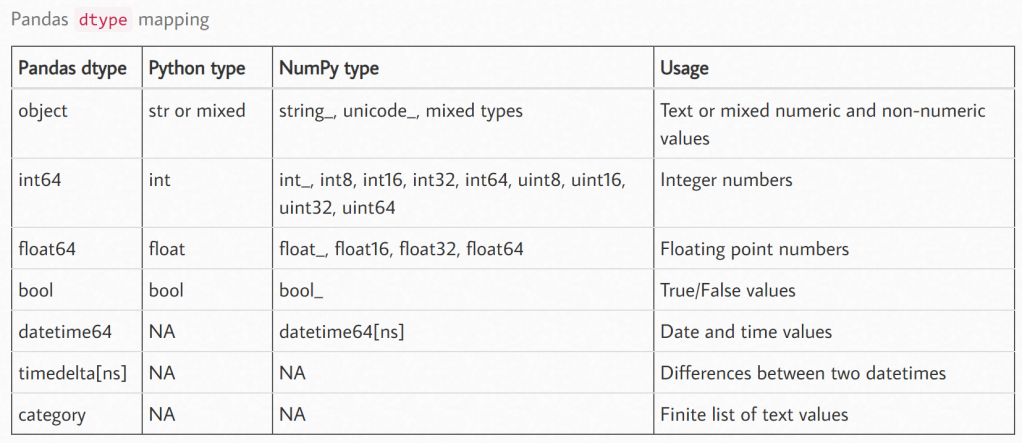

이미지 출처: https://paulvanderlaken.com/2020/09/08/handling-converting-data-types-python-pandas/

- 아래 예제의 경우, 결측치로 인해 사용가능한 데이터타입이 제한되어 있음. 결측치가 없는 경우에는 다양한 데이터타입의 사용이 가능

In [14]:
import numpy as np
dtype = {'name':'string', 'sn':'Int64', 'mid':'Int64', 'final':'Int64', 'quiz':'Int64', 'total':'float32'}
df = pd.read_csv('./data/sample.csv', dtype=dtype)
df

,name,sn,mid,final,quiz,total
0,Park,1001,70,60,10,NaN
1,Kim,1002,80,75,10,NaN
2,Lee,1003,<NA>,<NA>,10,NaN
3,Kang,1004,90,49,10,NaN
4,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


In [15]:
fill_rule = {'name':'John', 'sn':1111, 'mid':10, 'final':20, 'quiz':5, 'total':15}
df.fillna(fill_rule)

,name,sn,mid,final,quiz,total
0,Park,1001,70,60,10,15.0
1,Kim,1002,80,75,10,15.0
2,Lee,1003,10,20,10,15.0
3,Kang,1004,90,49,10,15.0
4,John,1111,10,20,5,15.0


### 2. 값의 변환, 치환
- 함수를 이용한 값의 변환: 다른 열의 값이나 조건에 따라 새로운 열의 값을 추가하고 싶을 때 사용

In [16]:
# 앞서 사용한 데이터프레임 예제를 변형해서 사용
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna'],
   'Age':[26,27,25,34],
   'Score':[89,97,67,55]}
 
df = pd.DataFrame(d)
df

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,97
2,Cathrine,25,67
3,Madonna,34,55


- 먼저 값을 변환하는 함수를 작성
- `map()`을 이용해 원하는 열에 함수를 적용

In [17]:
# 점수에 따라 평점을 산출하는 함수 작성
def get_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    else:
        return 'C'

# 'Score'열에 작성한 함수를 적용해서 'Grade' 열을 새로 생성
df['Grade'] = df['Score'].map(get_grade)
df

,Name,Age,Score,Grade
0,Alisa,26,89,B
1,Bobby,27,97,A
2,Cathrine,25,67,C
3,Madonna,34,55,C


- `replace()` 메서드를 이용하면 항목의 값을 일괄적으로 변경할 수 있음

In [18]:
# C 학점을 일괄적으로 F 학점으로 변경
df.replace('C', 'F')

,Name,Age,Score,Grade
0,Alisa,26,89,B
1,Bobby,27,97,A
2,Cathrine,25,67,F
3,Madonna,34,55,F


In [19]:
# 일괄적으로 학점을 한 등급씩 낮추고 싶다면? 리스트를 사용해서 표현
df.replace(['A', 'B', 'C'], ['B', 'C', 'D'])

,Name,Age,Score,Grade
0,Alisa,26,89,C
1,Bobby,27,97,B
2,Cathrine,25,67,D
3,Madonna,34,55,D


In [20]:
# 일괄적으로 학점을 한 등급씩 낮추고 싶다면? 딕셔너리도 사용 가능
df.replace({'A':'B', 'B':'C', 'C':'D'})

,Name,Age,Score,Grade
0,Alisa,26,89,C
1,Bobby,27,97,B
2,Cathrine,25,67,D
3,Madonna,34,55,D


### 3. 이상치 처리하기
#### 이상치의 기준
- 연구자가 직접 정의: 도메인 지식을 알고 있는 연구자가 이상치의 기준을 직접 설정
- 통계적인 방법: IQR을 이용해서 전체 데이터 분포에서 일정 범위를 벗어나면 이상치로 간주

numpy 랜덤 시드의 역할
- 시드가 없으면 매번 다른 값들이 생성됨
- 재현가능성(reproducability)이 없으면 검증이 어려움
- 시드를 설정하면 항상 같은 랜덤 값 생성

In [21]:
import numpy as np
np.random.seed(7) # 시드 설정

In [22]:
# 표준정규분포로부터 값을 샘플링
df = pd.DataFrame(np.random.randn(100, 4))
# 분포를 확인
df.describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,0.047307,-0.147641,-0.119835,0.019954
std,1.045949,0.925316,0.967700,1.009611
min,-3.082505,-2.291420,-2.305183,-2.288315
25%,-0.573280,-0.749157,-0.658941,-0.681693
50%,0.005001,-0.064927,-0.113260,0.101565
75%,0.764327,0.562054,0.416827,0.741360
max,2.861067,1.779026,2.638539,2.247595


위 통계값을 보고 이상치를 연구자가 설정
- 예를 들어 -2.5보다 작고 2.5보다 크면 이상치로 정의

In [23]:
# 열 0의 이상치 개수 확인
print(((df[0] > 2.5) | (df[0] < -2.5)).sum())
# 전체 데이터프레임의 이상치 개수를 열 별로 확인
print(((df > 2.5) | (df < -2.5)).sum())

2
0    2
1    0
2    1
3    0
dtype: int64


In [24]:
# df[0]의 값 중에서 2.5보다 크거나, -2.5보다 작은 값이 있는 행을 출력
df[(df[0] > 2.5) | (df[0] < -2.5)]

,0,1,2,3
79,2.861067,-0.61009,-0.762025,0.304307
96,-3.082505,-1.51800,-0.069594,-0.175262


잠깐만! any()와 all() 메서드
- any(): 항목 중 하나라도 조건을 만족하면 True
- all(): 항목 전체가 조건을 만족해야 True

In [25]:
print(df.iloc[0])
print((df.iloc[0] < 0)) # 각 값에 대해 조건식을 평가
print((df.iloc[0] < 0).any()) # 항목 중 0보다 작은 것이 하나라도 있으면 True
print((df.iloc[0] < 0).all()) # 항목 모두 0보다 작아야 True

0    1.690526
1   -0.465937
2    0.032820
3    0.407516
Name: 0, dtype: float64
0    False
1     True
2    False
3    False
Name: 0, dtype: bool
True
False


- any()를 행 별로 적용하고 싶으면 axis=1
- any()를 열 별로 적용하고 싶으면 axis=0

In [26]:
# 위 조건을 확장해서, 행(axis=1)의 값중 하나라도(any) 2.5보다 크거나, -2.5보다 작은 값이 있는 행을 출력
df[(df > 2.5).any(axis=1) | (df < -2.5).any(axis=1)]

,0,1,2,3
79,2.861067,-0.610090,-0.762025,0.304307
87,1.659561,-0.736674,2.638539,1.982185
96,-3.082505,-1.518000,-0.069594,-0.175262


In [27]:
# 이상치의 인덱스를 추출
outlier_index = df[(df > 2.5).any(axis=1) | (df < -2.5).any(axis=1)].index
outlier_index

Index([79, 87, 96], dtype='int64')

In [28]:
# 이상치 인덱스를 이용해 해당 행을 삭제
df.drop(outlier_index).shape

(97, 4)

#### 이상치를 제거하는 다른 방법
- 이상치가 아닌 정상 행들을 추출

In [29]:
# 이상치가 아닌 행들을 출력 - 위 조건과는 반대
# 행의 값 중에서 하나라도(any) 작은 것이 아니라 모두(all) 2.5보다 작은 행을 선택
df[(df <= 2.5).all(axis=1) & (df >= -2.5).all(axis=1)].shape

(97, 4)

In [30]:
# 위 조건에 맞는 행들로 df를 교체하고 통계를 확인
df = df[(df <= 2.5).all(axis=1) & (df >= -2.5).all(axis=1)]
df.describe()

,0,1,2,3
count,97.000000,97.000000,97.000000,97.000000
mean,0.033945,-0.122673,-0.142169,-0.001194
std,0.957303,0.925707,0.938948,1.004674
min,-2.299249,-2.291420,-2.305183,-2.288315
25%,-0.568456,-0.723885,-0.654039,-0.740296
50%,-0.012242,-0.049002,-0.126909,0.072508
75%,0.736378,0.565882,0.415503,0.731154
max,2.259947,1.779026,1.912019,2.247595


#### 통계적인 방법을 이용한 이상치 제거

- IQR을 이용해서 전체 데이터 분포에서 일정 범위를 벗어나면 이상치로 간주
- IQR(InterQuartile Range): 3사분위수 - 1사분위수
- 최대허용값(upper fence): Q3 + 1.5 * IQR
- 최소허용값(lower fence): Q1 - 1.5 * IQR
- 이상치: 최대허용값과 최소허용값을 벗어난 값들
 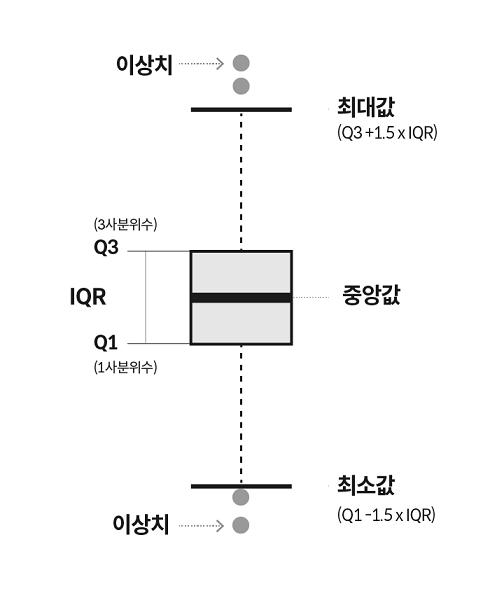

In [31]:
#필요한 패키지를 import
import matplotlib.pyplot as plt

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()   #윈도우
font_name = 'AppleGothic'  #맥 OS 
rc('font', family=font_name) 			

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [32]:
# 표준정규분포로부터 값을 다시 샘플링
np.random.seed(7) # 시드 설정
df = pd.DataFrame(np.random.randn(100, 4))
# 분포를 확인
df.describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,0.047307,-0.147641,-0.119835,0.019954
std,1.045949,0.925316,0.967700,1.009611
min,-3.082505,-2.291420,-2.305183,-2.288315
25%,-0.573280,-0.749157,-0.658941,-0.681693
50%,0.005001,-0.064927,-0.113260,0.101565
75%,0.764327,0.562054,0.416827,0.741360
max,2.861067,1.779026,2.638539,2.247595


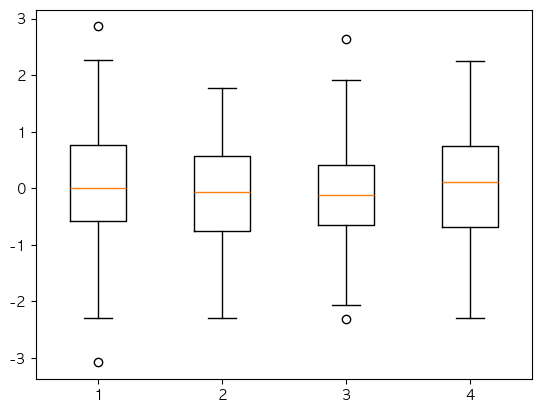

In [33]:
plt.boxplot(df)
plt.show()

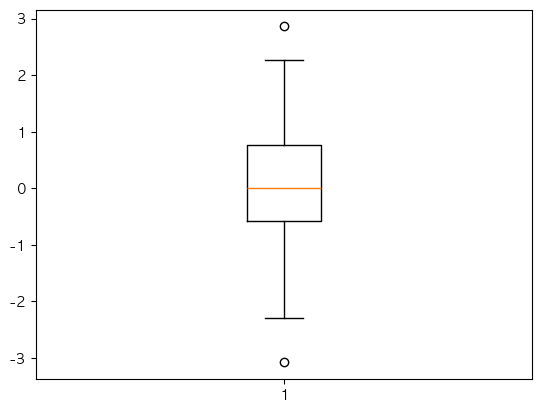

In [34]:
plt.boxplot(df[0])
plt.show()

#### IQR 계산
- `quantile()`: 주어진 인수에 해당하는 quantile값을 반환
- 예) `quantile(0.25)`: 25% 즉 1사분위수, `quantile(0.75)`: 75% 즉 3사분위수
- 각 열별로 계산해야 하므로 axis=0 사용

In [35]:
df.quantile(0.75, axis=0)

0    0.764327
1    0.562054
2    0.416827
3    0.741360
Name: 0.75, dtype: float64

In [36]:
# iqr을 이용해 최대허용값과 최소허용값을 계산
iqr = df.quantile(0.75, axis=0) - df.quantile(0.25, axis=0)
upper_bound = df.quantile(0.75, axis=0) + 1.5 * iqr
print(upper_bound)
lower_bound = df.quantile(0.25, axis=0) - 1.5 * iqr
print(lower_bound)

0    2.770739
1    2.528869
2    2.030479
3    2.875940
dtype: float64
0   -2.579692
1   -2.715973
2   -2.272592
3   -2.816274
dtype: float64


In [37]:
(df > upper_bound).any() #결과를 박스플롯과 비교

0     True
1    False
2     True
3    False
dtype: bool

In [38]:
(df < lower_bound).any() #결과를 박스플롯과 비교

0     True
1    False
2     True
3    False
dtype: bool

In [39]:
# 이상치가 아닌 행들을 출력 - 위 조건과는 반대
# 행의 값 중에서 하나라도(any) 작은 것이 아니라 모두(all) lower_bound보다 작은 행을 선택
df[(df <= upper_bound).all(axis=1) & (df >= lower_bound).all(axis=1)].shape

(96, 4)

In [40]:
# 위 조건에 맞는 행들로 df를 교체하고 통계를 확인
df = df[(df <= upper_bound).all(axis=1) & (df >= lower_bound).all(axis=1)]
df.describe()

,0,1,2,3
count,96.000000,96.000000,96.000000,96.000000
mean,0.040220,-0.119516,-0.119638,-0.010617
std,0.960321,0.930042,0.917138,1.005630
min,-2.299249,-2.291420,-2.064415,-2.288315
25%,-0.569408,-0.739565,-0.649589,-0.742488
50%,0.005001,-0.023468,-0.113260,0.045935
75%,0.742448,0.574536,0.416827,0.690260
max,2.259947,1.779026,1.912019,2.247595


In [41]:
# 통계와 상한선, 하한선 비교
print(upper_bound, '\n', lower_bound)

0    2.770739
1    2.528869
2    2.030479
3    2.875940
dtype: float64 
 0   -2.579692
1   -2.715973
2   -2.272592
3   -2.816274
dtype: float64


### 4. 데이터 타입 변환
- 열의 데이터 타입을 분석 목적에 맞게 변환

In [42]:
df = pd.read_csv('./data/type.csv')
df

,name,sn,mid,final,quiz
0,Park,1001,70,60,8
1,Kim,1002,80,75,10
2,Lee,1003,60,65,5
3,Kang,1004,90,79,10
4,Hong,1005,70,67,8


In [43]:
df.info() # 각 열에 대해 데이터 타입 외에 다양한 정보를 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5 non-null      object
 1   sn      5 non-null      int64 
 2   mid     5 non-null      int64 
 3   final   5 non-null      int64 
 4   quiz    5 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 328.0+ bytes


In [44]:
df.dtypes # 각 열의 데이터 타입 정보를 확인

name     object
sn        int64
mid       int64
final     int64
quiz      int64
dtype: object

#### Pandas에서 object와 string의 차이
- object: 문자열 외에도 정수, 실수 등 다양한 타입을 저장할 수 있음
- string: 파이썬 문자열을 저장

In [45]:
# name 열의 데이터 타입을 문자열로 변경
df['name'] = df['name'].astype('string')
df.dtypes

name     string[python]
sn                int64
mid               int64
final             int64
quiz              int64
dtype: object

In [46]:
# final 열의 데이터 타입을 실수로 변경
df['final'] = df['final'].astype('float')
df.dtypes

name     string[python]
sn                int64
mid               int64
final           float64
quiz              int64
dtype: object

#### category 데이터 타입
- 문자열과 유사하나 미리 정해진 범주형 문자열 값을 가지는 경우
- 예를 들어 혈액형은 문자열로 저장 가능하지만 'A', 'B', 'AB', 'O' 중에서만 할당이 가능함
- 먼저 열을 생성하고 category 타입으로 변환하거나, 처음부터 category 타입으로 열을 생성할 수 있음

In [47]:
# 우선 문자열로 열을 생성
df['blood_type'] = ['A', 'B', 'A', 'O', 'AB']
df

,name,sn,mid,final,quiz,blood_type
0,Park,1001,70,60.0,8,A
1,Kim,1002,80,75.0,10,B
2,Lee,1003,60,65.0,5,A
3,Kang,1004,90,79.0,10,O
4,Hong,1005,70,67.0,8,AB


In [48]:
df.dtypes

name          string[python]
sn                     int64
mid                    int64
final                float64
quiz                   int64
blood_type            object
dtype: object

In [49]:
# 열의 데이터 타입을 category로 변환
df['blood_type'] = df['blood_type'].astype('category')
df['blood_type'].dtypes

CategoricalDtype(categories=['A', 'AB', 'B', 'O'], ordered=False, categories_dtype=object)

In [50]:
# 혹은 pd.Categorical()을 이용해 처음부터 category 타입으로 생성
df['blood_type'] = pd.Categorical(['A', 'B', 'A', 'O', 'AB'])
df['blood_type'].dtypes

CategoricalDtype(categories=['A', 'AB', 'B', 'O'], ordered=False, categories_dtype=object)

#### category 데이터 타입의 이해
- category 타입은 내부적으로는 숫자로 저장됨
- 이 때 숫자를 결정하는 것은 categories의 순서로, 0부터 차례대로 할당됨
- 예를 들어 위의 경우에는 'A'가 0, 'AB'가 1, 'B'가 2의 순서로 값이 할당됨
- 내부에 저장되는 값을 보고 싶으면 아래와 같이 array 속성을 보면 됨

In [51]:
c = df['blood_type'].array #array 속성 값을 추출
print(type(c))
print(c.categories) #사용된 카테고리 값 - 앞부터 코드 값이 0, 1, 2, ... 순서로 할당됨
print(c.codes) #실제로 저장된 코드

<class 'pandas.core.arrays.categorical.Categorical'>
Index(['A', 'AB', 'B', 'O'], dtype='object')
[0 2 0 3 1]


- 위에서는 리스트로부터 category 데이터 타입으로 변환하면서 자동으로 categories와 codes가 생성되었으나,
- 아래와 같이 직접 categories와 codes를 만들고 이로부터 category를 생성할 수 있음

In [52]:
blood_types = ['A', 'AB', 'B', 'O'] # 코드의 값을 결정하는 인덱스의 역할을 함
codes = [0, 1, 3, 1, 0, 2, 0, 0]
# blood_types를 참조하여 codes의 값으로부터 category 타입의 시리즈 생성
data_blood = pd.Categorical.from_codes(codes, blood_types)
data_blood

['A', 'AB', 'O', 'AB', 'A', 'B', 'A', 'A']
Categories (4, object): ['A', 'AB', 'B', 'O']

#### 순서가 있는 category type 만들기
- category 중 순서가 있는 경우가 있음
- 예를 들어 low, medium, high는 low < medium < high 의 순서를 가짐
- 이와 같은 순서를 반영해서 category data type을 만드는 것이 가능

In [53]:
from pandas.api.types import CategoricalDtype

# 카테고리 데이터와 순서 정의
categories = ['low', 'medium', 'high']
ordered_cat_type = CategoricalDtype(categories=categories, ordered=True)

# 데이터프레임 생성
data = pd.Series(['low', 'high', 'medium', 'medium', 'low'])

# 순서가 있는 카테고리 타입 적용
ordered_data = data.astype(ordered_cat_type)

# 결과 확인
ordered_data

0       low
1      high
2    medium
3    medium
4       low
dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

- 순서가 있는 category는 값을 이용한 크기 비교가 가능하고,
- 정렬도 가능해진다.

In [66]:
# 순서 비교 예제
print(ordered_data > 'low')  # 'low'보다 높은 카테고리인지 확인
print(ordered_data < 'high') # 'high'보다 낮은 카테고리인지 확인

0    False
1     True
2     True
3     True
4    False
dtype: bool
0     True
1    False
2     True
3     True
4     True
dtype: bool


In [65]:
ordered_data.sort_values()

0       low
4       low
2    medium
3    medium
1      high
dtype: category
Categories (3, object): ['low' < 'medium' < 'high']